In [236]:
import pandas as pd
import matplotlib.pyplot as plt

In [237]:
df = pd.read_csv('tweets.csv')
df

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [239]:
df['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [240]:
df.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [241]:
import re
import unidecode

In [242]:
def clean_keywords(keyword):
    cleaned = re.sub(r'%20', ' ', keyword)
    return cleaned
def to_lowercase(keyword):
    return keyword.lower()
def remove_accents(keyword):
    cleaned = unidecode.unidecode(keyword)
    return cleaned
def remove_punctuation(keyword):
    cleaned = re.sub(r"[!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n -' ]"," ",keyword)
    return cleaned

In [243]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?:\/\/.*?[\s+]))',' ',data)
def remove_mentions(data):
    return re.sub('@[\w]*',' ',data)

In [244]:
df['cleaned_tweet'] = df['tweet'].apply(lambda x: to_lowercase(x))
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: cleaning_URLs(x))
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: remove_mentions(x))
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: remove_accents(x))
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: remove_punctuation(x))
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: clean_keywords(x))


In [245]:
#df['cleaned_tweer'] = df['tweet']

In [246]:
df

,id,label,tweet,cleaned_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps ...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...,i m wired i know i m george i was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple won t even talk to...
...,...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...,live out loud lol liveoutloud selfie smile...
7916,7917,0,We would like to wish you an amazing day! Make...,we would like to wish you an amazing day make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...,helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...,finally got my smart pocket wifi stay conne...


In [247]:
df.iloc[7905]

id                                                            7906
label                                                            0
tweet            ove a fist inside my $&@*# Oh #god #i #a #fist...
cleaned_tweet    ove a fist inside my       oh  god  i  a  fist...
Name: 7905, dtype: object

In [248]:
df['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [249]:
print(cleaning_URLs('#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'))

#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone


In [250]:
from sklearn.model_selection import train_test_split

In [251]:
x_train, x_test, y_train, y_test = train_test_split(df['cleaned_tweet'], df['label'], test_size=0.15, random_state=134)

In [252]:
from tensorflow.keras.preprocessing.text import Tokenizer

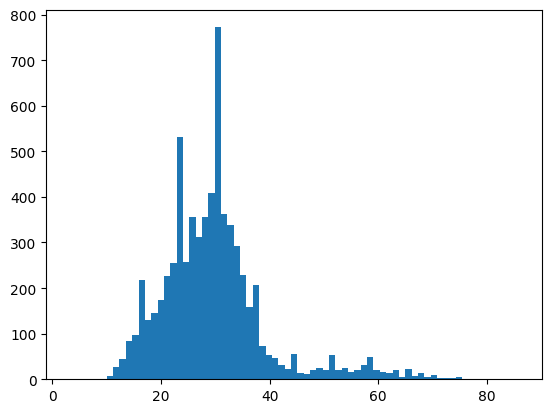

In [253]:
lengths = [len(t.split(' ')) for t in x_train]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [254]:
tokenizer = Tokenizer(num_words=10000, oov_token="<UNK>")
tokenizer.fit_on_texts(x_train)
tokenizer_test = Tokenizer(num_words=10000, oov_token="<UNK>")
tokenizer_test.fit_on_texts(x_test)

In [255]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [256]:
maxlen = 70
def get_seqeuences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating="post", padding="post", maxlen=maxlen)
  return padded

In [257]:
padded_train_seq = get_seqeuences(tokenizer, x_train)
padded_test_seq = get_seqeuences(tokenizer_test, x_test)

In [258]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [259]:
'''model = Sequential()
model.add(Embedding(10000, 16, input_length = maxlen))
model.add(Bidirectional(LSTM(20, return_sequences=True)))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(6, activation = "softmax"))
model.summary()'''

'model = Sequential()\nmodel.add(Embedding(10000, 16, input_length = maxlen))\nmodel.add(Bidirectional(LSTM(20, return_sequences=True)))\nmodel.add(Bidirectional(LSTM(20)))\nmodel.add(Dense(6, activation = "softmax"))\nmodel.summary()'

In [260]:
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [261]:
#h = model.fit(padded_train_seq, y_train, validation_data=(padded_test_seq, y_test), epochs=30, callbacks=[EarlyStopping(monitor='val_accuracy', patience=4)])

In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [263]:
model = LogisticRegression()
model.fit(padded_train_seq, y_train)

/home/neeraj/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [264]:
pred = model.predict(padded_test_seq)
print("f1 score :",f1_score(y_test, pred))
print("accuracy score :",accuracy_score(y_test, pred))

f1 score : 0.030487804878048776
accuracy score : 0.7323232323232324
